# **Importing the Neccessary Libraries**

In [ ]:
import pandas as pd # library for data analysis
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents
import numpy as np

# Web Scraping Data


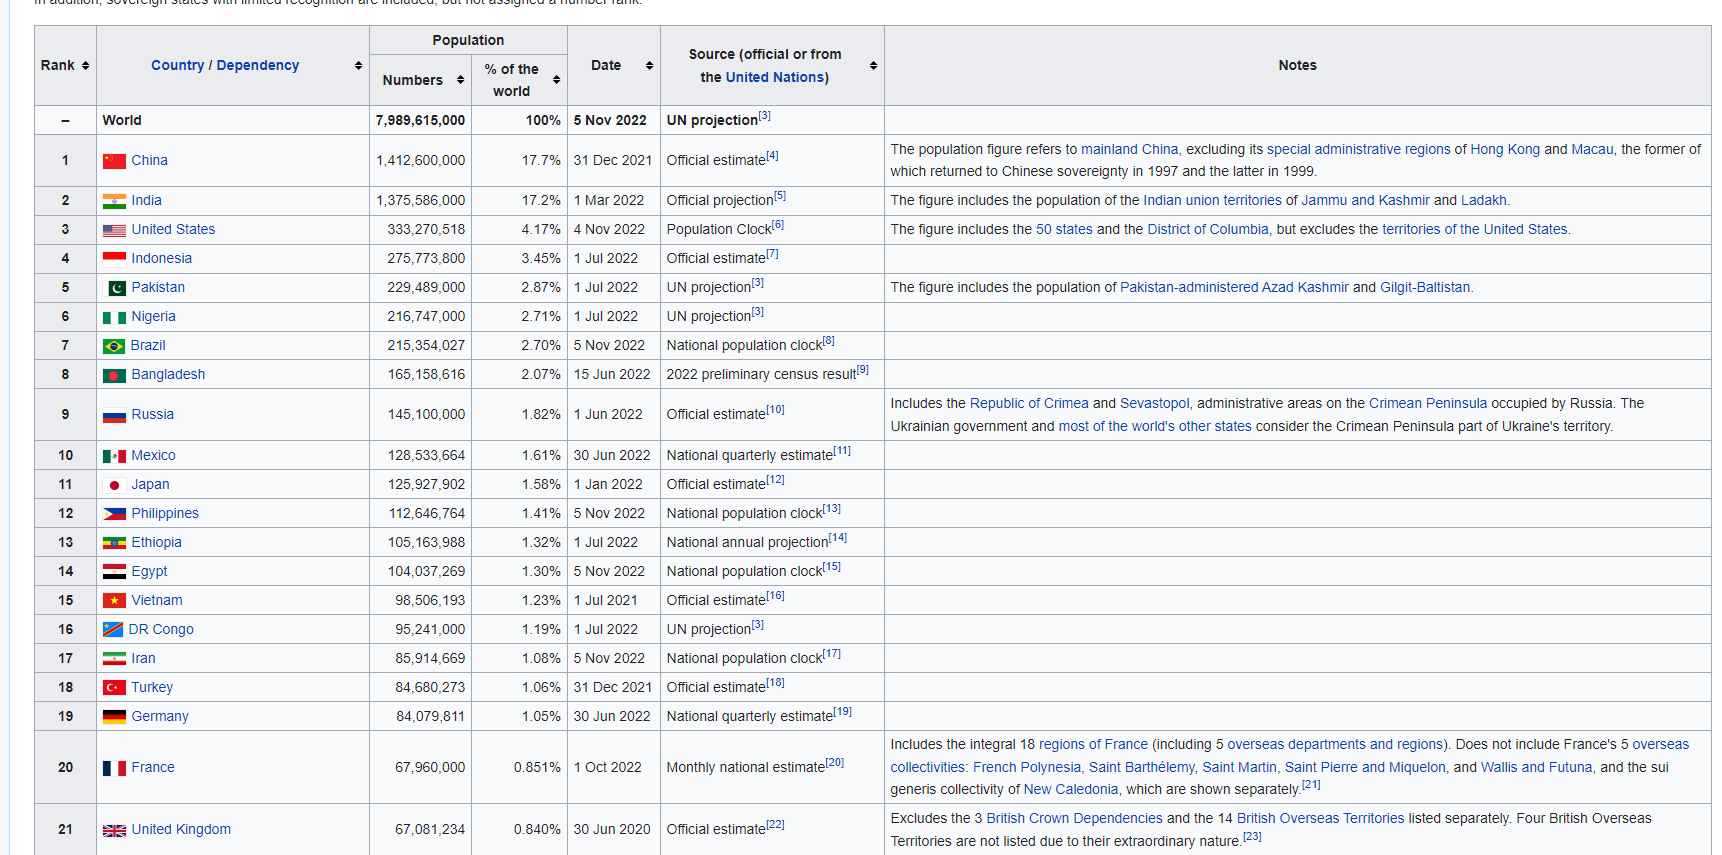

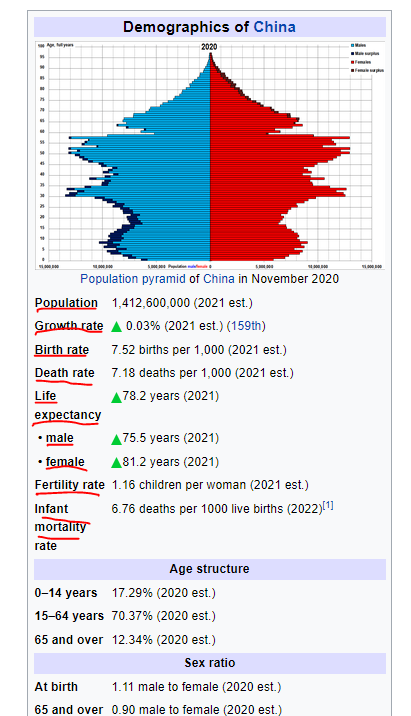

In [ ]:
# get the response in the form of html
wikiurl="https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)

In [ ]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
table=soup.find('table',{'class':"wikitable"})

In [ ]:
dataf=pd.read_html(str(table))
# convert list to dataframe
dataf=pd.DataFrame(dataf[0])

In [ ]:
dataf.columns = list(dataf.columns)

In [ ]:
dataf.rename(columns = {('Rank', 'Rank'):'Rank',('Country / Dependency', 'Country / Dependency'):'Country',('Population', 'Numbers'):'Population',('Population', '% of the world'):'Population % of the world',('Date', 'Date'):'Date',('Source (official or from the United Nations)', 'Source (official or from the United Nations)'):'Source',('Notes', 'Notes'):'Notes'}, inplace = True)

In [ ]:
dataf.columns = ['Rank','Country','Population','Population % of the world','Date','Source','Notes']

In [ ]:
dataf.drop('Population % of the world', axis = 1, inplace = True)

In [ ]:
dataf.drop('Notes', axis = 1, inplace = True)

In [ ]:
dataf

,Rank,Country,Population,Date,Source
0,–,World,7989615000,5 Nov 2022,UN projection[3]
1,1,China,1412600000,31 Dec 2021,Official estimate[4]
2,2,India,1375586000,1 Mar 2022,Official projection[5]
3,3,United States,333270518,4 Nov 2022,Population Clock[6]
4,4,Indonesia,275773800,1 Jul 2022,Official estimate[7]
...,...,...,...,...,...
237,–,Niue (New Zealand),1549,1 Jul 2021,National annual projection[95]
238,–,Tokelau (New Zealand),1501,1 Jul 2021,National annual projection[95]
239,195,Vatican City,825,1 Feb 2019,Monthly national estimate[199]
240,–,Cocos (Keeling) Islands (Australia),573,30 Jun 2020,Official estimate[198]


# **Getting the links to each country**

In [ ]:
l = table.find_all('a')

In [ ]:
dataf.drop(0, axis = 0, inplace = True)

In [ ]:
lis = []
for i in l:
  if i['href'].startswith('/wiki/Demographics'):
    lis.append(i['href'])

In [ ]:
new_df = dataf[:50]

In [ ]:
links = lis[:50]

In [ ]:
countries = list(new_df['Country'])
new = []
x = 0
ci = 0
li = 0
while x==0:
  c = countries[ci]
  print(c)
  link = links[li]
  print(link)
  if c[-3:]==link[-3:]:
    new.append(link)
    ci+=1
    li+=1
  else:
    new.append('$$$$')
    ci+=1
  if ci==len(countries):
    x = 1

China
/wiki/Demographics_of_China
India
/wiki/Demographics_of_India
United States
/wiki/Demographics_of_the_United_States
Indonesia
/wiki/Demographics_of_Indonesia
Pakistan
/wiki/Demographics_of_Pakistan
Nigeria
/wiki/Demographics_of_Nigeria
Brazil
/wiki/Demographics_of_Brazil
Bangladesh
/wiki/Demographics_of_Bangladesh
Russia
/wiki/Demographics_of_Russia
Mexico
/wiki/Demographics_of_Mexico
Japan
/wiki/Demographics_of_Japan
Philippines
/wiki/Demographics_of_the_Philippines
Ethiopia
/wiki/Demographics_of_Ethiopia
Egypt
/wiki/Demographics_of_Egypt
Vietnam
/wiki/Demographics_of_Vietnam
DR Congo
/wiki/Demographics_of_the_Democratic_Republic_of_the_Congo
Iran
/wiki/Demographics_of_Iran
Turkey
/wiki/Demographics_of_Turkey
Germany
/wiki/Demographics_of_Germany
France
/wiki/Demographics_of_France
United Kingdom
/wiki/Demographics_of_Thailand
Thailand
/wiki/Demographics_of_Thailand
Tanzania
/wiki/Demographics_of_Tanzania
South Africa
/wiki/Demographics_of_South_Africa
Italy
/wiki/Demographics_o

In [ ]:
links = lis[:50]

In [ ]:
new_df['Links'] = new

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
new_df.reset_index(drop = True, inplace = True)

In [ ]:
new_df

,Rank,Country,Population,Date,Source,Links
0,1,China,1412600000,31 Dec 2021,Official estimate[4],/wiki/Demographics_of_China
1,2,India,1375586000,1 Mar 2022,Official projection[5],/wiki/Demographics_of_India
2,3,United States,333270518,4 Nov 2022,Population Clock[6],/wiki/Demographics_of_the_United_States
3,4,Indonesia,275773800,1 Jul 2022,Official estimate[7],/wiki/Demographics_of_Indonesia
4,5,Pakistan,229489000,1 Jul 2022,UN projection[3],/wiki/Demographics_of_Pakistan
5,6,Nigeria,216747000,1 Jul 2022,UN projection[3],/wiki/Demographics_of_Nigeria
6,7,Brazil,215354027,5 Nov 2022,National population clock[8],/wiki/Demographics_of_Brazil
7,8,Bangladesh,165158616,15 Jun 2022,2022 preliminary census result[9],/wiki/Demographics_of_Bangladesh
8,9,Russia,145100000,1 Jun 2022,Official estimate[10],/wiki/Demographics_of_Russia
9,10,Mexico,128533664,30 Jun 2022,National quarterly estimate[11],/wiki/Demographics_of_Mexico


# **Going to each link to get more columns**

In [ ]:
newurl = "https://en.wikipedia.org/wiki/Demographics_of_China"
source = requests.get(newurl).text
soup = BeautifulSoup(source, 'lxml')
links = soup.find('table',class_ = "infobox")
df=pd.read_html(str(links))
# convert list to dataframe
df=pd.DataFrame(df[0])
df.columns = [0,1]
df= df[:9]
df.drop(0,inplace = True)
df.reset_index(drop = True, inplace = True)

In [ ]:
df

,0,1
0,Population,"1,412,600,000 (2021 est.)"
1,Growth rate,0.03% (2021 est.) (159th)
2,Birth rate,"7.52 births per 1,000 (2021 est.)"
3,Death rate,"7.18 deaths per 1,000 (2021 est.)"
4,Life expectancy,78.2 years (2021)
5,• male,75.5 years (2021)
6,• female,81.2 years (2021)
7,Fertility rate,1.16 children per woman (2021 est.)


In [ ]:
all_links = list(new_df['Links'])
import numpy as np
for i in range(1,len(all_links)):
  print(all_links[i])
  if all_links[i]=='$$$$':
    a = np.arange(len(df[0]))
    a.fill(np.NaN)
    s = pd.DataFrame({0:df[0],1:a})
    s.columns = [0,1]
    s= s[:9]
    s.drop(0, inplace = True)
    print(type(s))
    df = df.merge(s, on=0, how = 'outer')
  else:
    newurl = "https://en.wikipedia.org{place}".format(place = all_links[i])
    source = requests.get(newurl).text
    soup = BeautifulSoup(source, 'lxml')
    links = soup.find('table',class_ = "infobox")
    data=pd.read_html(str(links))
    # convert list to dataframe
    df_=pd.DataFrame(data[0])
    df_.columns = [0,1]
    df_= df_[:9]
    df_.drop(0, inplace = True)
    df_.reset_index(drop = True,inplace = True)
    print(type(df_))
    df = df.merge(df_, on=0, how = 'outer')

/wiki/Demographics_of_India
<class 'pandas.core.frame.DataFrame'>
/wiki/Demographics_of_the_United_States
<class 'pandas.core.frame.DataFrame'>
/wiki/Demographics_of_Indonesia
<class 'pandas.core.frame.DataFrame'>
/wiki/Demographics_of_Pakistan


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:9203: FutureWarning: Passing 'suffixes' which cause duplicate columns {'1_x'} in the result is deprecated and will raise a MergeError in a future version.
  validate=validate,


<class 'pandas.core.frame.DataFrame'>
/wiki/Demographics_of_Nigeria
<class 'pandas.core.frame.DataFrame'>
/wiki/Demographics_of_Brazil
<class 'pandas.core.frame.DataFrame'>
/wiki/Demographics_of_Bangladesh
<class 'pandas.core.frame.DataFrame'>
/wiki/Demographics_of_Russia
<class 'pandas.core.frame.DataFrame'>
/wiki/Demographics_of_Mexico
<class 'pandas.core.frame.DataFrame'>
/wiki/Demographics_of_Japan
<class 'pandas.core.frame.DataFrame'>
/wiki/Demographics_of_the_Philippines
<class 'pandas.core.frame.DataFrame'>
/wiki/Demographics_of_Ethiopia
<class 'pandas.core.frame.DataFrame'>
/wiki/Demographics_of_Egypt
<class 'pandas.core.frame.DataFrame'>
/wiki/Demographics_of_Vietnam
<class 'pandas.core.frame.DataFrame'>
/wiki/Demographics_of_the_Democratic_Republic_of_the_Congo
<class 'pandas.core.frame.DataFrame'>
/wiki/Demographics_of_Iran
<class 'pandas.core.frame.DataFrame'>
/wiki/Demographics_of_Turkey
<class 'pandas.core.frame.DataFrame'>
/wiki/Demographics_of_Germany
<class 'pandas.cor

In [ ]:
df

,0,1_x,1_y,1_x,1_y,1_x,1_y,1_x,1_y,1_x,...,1_x,1_y,1_x,1_y,1_x,1_y,1_x,1_y,1_x,1_y
0,Population,"1,412,600,000 (2021 est.)","1,407,563,842[1] (2021 est.)","332,403,650 (2022 projection)[1]","270,203,917 (2020 census)","242,923,845 (2022)[1]","218,541,212 (2022 est.)","217,240,060 (2022 est.)","169,356,251 (2021 est.)[1][2]","144,699,673 (internationally recognized border...",...,"35,950,396 (2021 est.)","32,275,736 (2022 est.)",34795287,"40,870,394 (2022)[1]","33,871,431 (2022 est.)","31,693,239 (2022 est.)","30,984,689 (2022 est.)","33,107,275 (2022 est.)","28,713,423 (2022 est.)","29,789,730 (2022 est.)"
1,Growth rate,0.03% (2021 est.) (159th),0.68% (2021 est.)[3],0.13% (2021)[2],0.79% (2022 est.),1.85% (2021 est.)[2],2.53% (2022 est.),0.7% (2022 est.),0.98% (2021 est.)[3],"-7.2 (December 1st, 2021)",...,1.49% (2019) [2],0.51% (2022 est.),NaN,2.34% (2016),1.03% (2022 est.),2.56% (2022 est.),1.88% (2022 est.),2.23% (2022 est.),2.19% (2022 est.),2.43% (2022 est.)
2,Birth rate,"7.52 births per 1,000 (2021 est.)","16.42 births/1,000 population (2021 est.)[4]","11.0 births/1,000 population (2021)","15.32 births/1,000 population (2022 est.)","27.5 births / 1,000 population (2021 est.)[2]","34.19 births/1,000 population (2022 est.)","13.96 births/1,000 population (2022 est.)","17.71 births/1,000 population (2020 est.)[3]","9.8 births/1,000 population (2021)[2]",...,"14.7 births/1,000 population (2018) [3]","17.21 births/1,000 population",41.8 births,"38.3 births/1,000 population (2016)","14.55 births/1,000 population (2022 est.)","37.47 births/1,000 population (2022 est.)","24.64 births/1,000 population (2022 est.)","28.55 births/1,000 population (2022 est.)","28.3 births/1,000 population (2022 est.)","17.27 births/1,000 population"
3,Death rate,"7.18 deaths per 1,000 (2021 est.)","9.45 deaths/1,000 population (2021 est.)[5]","10.4 deaths/1,000 population (2021)","6.75 deaths/1,000 population (2022 est.)","7.2 deaths / 1,000 population (2021 est.)[2]","8.7 deaths/1,000 population (2022 est.)","6.81 deaths/1,000 population (2022 est.)","5.54 deaths/1,000 population (2020 est.)[3]","16.7 deaths/1,000 population (2021)[2]",...,"3.4 deaths/1,000 population","11.32 deaths/1,000 population",8.01 deaths,"13.7 deaths/1,000 population (2016)","5.69 deaths/1,000 population (2022 est.)","10.25 deaths/1,000 population (2022 est.)","5.62 deaths/1,000 population (2022 est.)","6.14 deaths/1,000 population (2022 est.)","7.6 deaths/1,000 population (2022 est.)","6.81 deaths/1,000 population"
4,Life expectancy,78.2 years (2021),67.2 years (2021 est.)[6],76.1 years (2021)[3],73.08 years,66.1 years (2021 est.)[2],61.33 years,75.92 years,72.72 years (2020)[3],70.09 years (2022)[3],...,75.7 years,68.94 years,62.11 years,63.2 years (2019)[2][3],76.13 years,57.1 years,67.51 years,69.37 years,62.26 years,73.29 years
5,• male,75.5 years (2021),65.8 years (2021 est.),73.2 years (2021)[3],70.86 years,63.8 years (2021 est.)[2],59.51 years,72.5 years,71.1 years,65.51 years (2021)[3],...,74.2 years,65.38 years,NaN,63.3 years,74.5 years,NaN,65.19 years,67.7 years,60.07 years,70.12 years
6,• female,81.2 years (2021),68.9 years (2020 est.),79.1 years (2021)[3],75.4 years,68.6 years (2021 est.)[2],63.27 years (2022 est.),79.5 years,74.4 years,74.51 years (2021)[3],...,77.3 years,72.67 years,NaN,63.2 years,77.87 years,NaN,69.94 years,71.09 years,64.52 years,76.62 years
7,Fertility rate,1.16 children per woman (2021 est.),NaN,NaN,2.01 children born/woman (2022 est.),NaN,4.62 children born/woman (2022 est.),1.8 children born/woman (2022 est.),2.00 children born/woman (2020 est.)[3],1.52 (2021)[4],...,NaN,2.2 children,5.83,5.33 children born/woman (2015),1.75 children born/woman (2022 est.),4.81 children born/woman (2022 est.),3.01 children born/woman (2022 est.),3.66 children born/woman (2022 est.),3.53 children born/woman (2022 est.),2.22 children
8,Density,NaN,473.42 people per.km2 (2021 est.)[2],86.16/sq mi (33.27/km2),NaN,260.8/km2 (675/sq mi)248.9/km2 (645/sq mi) 

In [ ]:
df = df.transpose()

In [ ]:
df.columns = df.iloc[0]

In [ ]:
df.drop(0, inplace = True)

In [ ]:
df.reset_index(drop = True, inplace = True)

In [ ]:
df.drop('Population',axis = 1, inplace = True)

In [ ]:
new_df

,Rank,Country,Population,Date,Source,Links
0,1,China,1412600000,31 Dec 2021,Official estimate[4],/wiki/Demographics_of_China
1,2,India,1375586000,1 Mar 2022,Official projection[5],/wiki/Demographics_of_India
2,3,United States,333270518,4 Nov 2022,Population Clock[6],/wiki/Demographics_of_the_United_States
3,4,Indonesia,275773800,1 Jul 2022,Official estimate[7],/wiki/Demographics_of_Indonesia
4,5,Pakistan,229489000,1 Jul 2022,UN projection[3],/wiki/Demographics_of_Pakistan
5,6,Nigeria,216747000,1 Jul 2022,UN projection[3],/wiki/Demographics_of_Nigeria
6,7,Brazil,215354027,5 Nov 2022,National population clock[8],/wiki/Demographics_of_Brazil
7,8,Bangladesh,165158616,15 Jun 2022,2022 preliminary census result[9],/wiki/Demographics_of_Bangladesh
8,9,Russia,145100000,1 Jun 2022,Official estimate[10],/wiki/Demographics_of_Russia
9,10,Mexico,128533664,30 Jun 2022,National quarterly estimate[11],/wiki/Demographics_of_Mexico


In [ ]:
final = pd.concat([new_df,df], axis = 1)

In [ ]:
final

,Rank,Country,Population,Date,Source,Links,Growth rate,Birth rate,Death rate,Life expectancy,• male,• female,Fertility rate,Density,Infant mortality rate,Net migration rate,Age structure,0–14 years
0,1,China,1412600000,31 Dec 2021,Official estimate[4],/wiki/Demographics_of_China,0.03% (2021 est.) (159th),"7.52 births per 1,000 (2021 est.)","7.18 deaths per 1,000 (2021 est.)",78.2 years (2021),75.5 years (2021),81.2 years (2021),1.16 children per woman (2021 est.),NaN,NaN,NaN,NaN,NaN
1,2,India,1375586000,1 Mar 2022,Official projection[5],/wiki/Demographics_of_India,0.68% (2021 est.)[3],"16.42 births/1,000 population (2021 est.)[4]","9.45 deaths/1,000 population (2021 est.)[5]",67.2 years (2021 est.)[6],65.8 years (2021 est.),68.9 years (2020 est.),NaN,473.42 people per.km2 (2021 est.)[2],NaN,NaN,NaN,NaN
2,3,United States,333270518,4 Nov 2022,Population Clock[6],/wiki/Demographics_of_the_United_States,0.13% (2021)[2],"11.0 births/1,000 population (2021)","10.4 deaths/1,000 population (2021)",76.1 years (2021)[3],73.2 years (2021)[3],79.1 years (2021)[3],NaN,86.16/sq mi (33.27/km2),NaN,NaN,NaN,NaN
3,4,Indonesia,275773800,1 Jul 2022,Official estimate[7],/wiki/Demographics_of_Indonesia,0.79% (2022 est.),"15.32 births/1,000 population (2022 est.)","6.75 deaths/1,000 population (2022 est.)",73.08 years,70.86 years,75.4 years,2.01 children born/woman (2022 est.),NaN,NaN,NaN,NaN,NaN
4,5,Pakistan,229489000,1 Jul 2022,UN projection[3],/wiki/Demographics_of_Pakistan,1.85% (2021 est.)[2],"27.5 births / 1,000 population (2021 est.)[2]","7.2 deaths / 1,000 population (2021 est.)[2]",66.1 years (2021 est.)[2],63.8 years (2021 est.)[2],68.6 years (2021 est.)[2],NaN,260.8/km2 (675/sq mi)248.9/km2 (645/sq mi) (in...,NaN,NaN,NaN,NaN
5,6,Nigeria,216747000,1 Jul 2022,UN projection[3],/wiki/Demographics_of_Nigeria,2.53% (2022 est.),"34.19 births/1,000 population (2022 est.)","8.7 deaths/1,000 population (2022 est.)",61.33 years,59.51 years,63.27 years (2022 est.),4.62 children born/woman (2022 est.),NaN,NaN,NaN,NaN,NaN
6,7,Brazil,215354027,5 Nov 2022,National population clock[8],/wiki/Demographics_of_Brazil,0.7% (2022 est.),"13.96 births/1,000 population (2022 est.)","6.81 deaths/1,000 population (2022 est.)",75.92 years,72.5 years,79.5 years,1.8 children born/woman (2022 est.),NaN,NaN,NaN,NaN,NaN
7,8,Bangladesh,165158616,15 Jun 2022,2022 preliminary census result[9],/wiki/Demographics_of_Bangladesh,0.98% (2021 est.)[3],"17.71 births/1,000 population (2020 est.)[3]","5.54 deaths/1,000 population (2020 est.)[3]",72.72 years (2020)[3],71.1 years,74.4 years,2.00 children born/woman (2020 est.)[3],NaN,NaN,NaN,NaN,NaN
8,9,Russia,145100000,1 Jun 2022,Official estimate[10],/wiki/Demographics_of_Russia,"-7.2 (December 1st, 2021)","9.8 births/1,000 population (2021)[2]","16.7 deaths/1,000 population (2021)[2]",70.09 years (2022)[3],65.51 years (2021)[3],74.51 years (2021)[3],1.52 (2021)[4],NaN,NaN,NaN,NaN,NaN
9,10,Mexico,128533664,30 Jun 2022,National quarterly estimate[11],/wiki/Demographics_of_Mexico,1.9% (2015)[2],"18.3 births/1,000 population (2016 est.)","5.8 deaths/1,000 population (2016 est.)",76.66 years,73.84 years,79.63 years (2012 est.),1.63 children born/woman (2020),NaN,NaN,NaN,NaN,NaN


In [ ]:
final = final[:50]

In [ ]:
final = final.iloc[:,:13]

In [ ]:
final

,Rank,Country,Population,Date,Source,Links,Growth rate,Birth rate,Death rate,Life expectancy,• male,• female,Fertility rate
0,1,China,1412600000,31 Dec 2021,Official estimate[4],/wiki/Demographics_of_China,0.03% (2021 est.) (159th),"7.52 births per 1,000 (2021 est.)","7.18 deaths per 1,000 (2021 est.)",78.2 years (2021),75.5 years (2021),81.2 years (2021),1.16 children per woman (2021 est.)
1,2,India,1375586000,1 Mar 2022,Official projection[5],/wiki/Demographics_of_India,0.68% (2021 est.)[3],"16.42 births/1,000 population (2021 est.)[4]","9.45 deaths/1,000 population (2021 est.)[5]",67.2 years (2021 est.)[6],65.8 years (2021 est.),68.9 years (2020 est.),NaN
2,3,United States,333270518,4 Nov 2022,Population Clock[6],/wiki/Demographics_of_the_United_States,0.13% (2021)[2],"11.0 births/1,000 population (2021)","10.4 deaths/1,000 population (2021)",76.1 years (2021)[3],73.2 years (2021)[3],79.1 years (2021)[3],NaN
3,4,Indonesia,275773800,1 Jul 2022,Official estimate[7],/wiki/Demographics_of_Indonesia,0.79% (2022 est.),"15.32 births/1,000 population (2022 est.)","6.75 deaths/1,000 population (2022 est.)",73.08 years,70.86 years,75.4 years,2.01 children born/woman (2022 est.)
4,5,Pakistan,229489000,1 Jul 2022,UN projection[3],/wiki/Demographics_of_Pakistan,1.85% (2021 est.)[2],"27.5 births / 1,000 population (2021 est.)[2]","7.2 deaths / 1,000 population (2021 est.)[2]",66.1 years (2021 est.)[2],63.8 years (2021 est.)[2],68.6 years (2021 est.)[2],NaN
5,6,Nigeria,216747000,1 Jul 2022,UN projection[3],/wiki/Demographics_of_Nigeria,2.53% (2022 est.),"34.19 births/1,000 population (2022 est.)","8.7 deaths/1,000 population (2022 est.)",61.33 years,59.51 years,63.27 years (2022 est.),4.62 children born/woman (2022 est.)
6,7,Brazil,215354027,5 Nov 2022,National population clock[8],/wiki/Demographics_of_Brazil,0.7% (2022 est.),"13.96 births/1,000 population (2022 est.)","6.81 deaths/1,000 population (2022 est.)",75.92 years,72.5 years,79.5 years,1.8 children born/woman (2022 est.)
7,8,Bangladesh,165158616,15 Jun 2022,2022 preliminary census result[9],/wiki/Demographics_of_Bangladesh,0.98% (2021 est.)[3],"17.71 births/1,000 population (2020 est.)[3]","5.54 deaths/1,000 population (2020 est.)[3]",72.72 years (2020)[3],71.1 years,74.4 years,2.00 children born/woman (2020 est.)[3]
8,9,Russia,145100000,1 Jun 2022,Official estimate[10],/wiki/Demographics_of_Russia,"-7.2 (December 1st, 2021)","9.8 births/1,000 population (2021)[2]","16.7 deaths/1,000 population (2021)[2]",70.09 years (2022)[3],65.51 years (2021)[3],74.51 years (2021)[3],1.52 (2021)[4]
9,10,Mexico,128533664,30 Jun 2022,National quarterly estimate[11],/wiki/Demographics_of_Mexico,1.9% (2015)[2],"18.3 births/1,000 population (2016 est.)","5.8 deaths/1,000 population (2016 est.)",76.66 years,73.84 years,79.63 years (2012 est.),1.63 children born/woman (2020)


In [ ]:
final.to_csv('Final.csv')

# Data Cleaning

In [ ]:
final.index

RangeIndex(start=0, stop=50, step=1)

In [ ]:
null = final[final['Links']=='$$$$'].index

In [ ]:
null

Int64Index([20, 36], dtype='int64')

In [ ]:
final.drop(null,inplace = True)

In [ ]:
final

,Rank,Country,Population,Date,Source,Links,Growth rate,Birth rate,Death rate,Life expectancy,• male,• female,Fertility rate
0,1,China,1412600000,31 Dec 2021,Official estimate[4],/wiki/Demographics_of_China,0.03% (2021 est.) (159th),"7.52 births per 1,000 (2021 est.)","7.18 deaths per 1,000 (2021 est.)",78.2 years (2021),75.5 years (2021),81.2 years (2021),1.16 children per woman (2021 est.)
1,2,India,1375586000,1 Mar 2022,Official projection[5],/wiki/Demographics_of_India,0.68% (2021 est.)[3],"16.42 births/1,000 population (2021 est.)[4]","9.45 deaths/1,000 population (2021 est.)[5]",67.2 years (2021 est.)[6],65.8 years (2021 est.),68.9 years (2020 est.),NaN
2,3,United States,333270518,4 Nov 2022,Population Clock[6],/wiki/Demographics_of_the_United_States,0.13% (2021)[2],"11.0 births/1,000 population (2021)","10.4 deaths/1,000 population (2021)",76.1 years (2021)[3],73.2 years (2021)[3],79.1 years (2021)[3],NaN
3,4,Indonesia,275773800,1 Jul 2022,Official estimate[7],/wiki/Demographics_of_Indonesia,0.79% (2022 est.),"15.32 births/1,000 population (2022 est.)","6.75 deaths/1,000 population (2022 est.)",73.08 years,70.86 years,75.4 years,2.01 children born/woman (2022 est.)
4,5,Pakistan,229489000,1 Jul 2022,UN projection[3],/wiki/Demographics_of_Pakistan,1.85% (2021 est.)[2],"27.5 births / 1,000 population (2021 est.)[2]","7.2 deaths / 1,000 population (2021 est.)[2]",66.1 years (2021 est.)[2],63.8 years (2021 est.)[2],68.6 years (2021 est.)[2],NaN
5,6,Nigeria,216747000,1 Jul 2022,UN projection[3],/wiki/Demographics_of_Nigeria,2.53% (2022 est.),"34.19 births/1,000 population (2022 est.)","8.7 deaths/1,000 population (2022 est.)",61.33 years,59.51 years,63.27 years (2022 est.),4.62 children born/woman (2022 est.)
6,7,Brazil,215354027,5 Nov 2022,National population clock[8],/wiki/Demographics_of_Brazil,0.7% (2022 est.),"13.96 births/1,000 population (2022 est.)","6.81 deaths/1,000 population (2022 est.)",75.92 years,72.5 years,79.5 years,1.8 children born/woman (2022 est.)
7,8,Bangladesh,165158616,15 Jun 2022,2022 preliminary census result[9],/wiki/Demographics_of_Bangladesh,0.98% (2021 est.)[3],"17.71 births/1,000 population (2020 est.)[3]","5.54 deaths/1,000 population (2020 est.)[3]",72.72 years (2020)[3],71.1 years,74.4 years,2.00 children born/woman (2020 est.)[3]
8,9,Russia,145100000,1 Jun 2022,Official estimate[10],/wiki/Demographics_of_Russia,"-7.2 (December 1st, 2021)","9.8 births/1,000 population (2021)[2]","16.7 deaths/1,000 population (2021)[2]",70.09 years (2022)[3],65.51 years (2021)[3],74.51 years (2021)[3],1.52 (2021)[4]
9,10,Mexico,128533664,30 Jun 2022,National quarterly estimate[11],/wiki/Demographics_of_Mexico,1.9% (2015)[2],"18.3 births/1,000 population (2016 est.)","5.8 deaths/1,000 population (2016 est.)",76.66 years,73.84 years,79.63 years (2012 est.),1.63 children born/woman (2020)


In [ ]:
df = final.copy()

In [ ]:
df.dtypes

Rank               object
Country            object
Population          int64
Date               object
Source             object
Links              object
Growth rate        object
Birth rate         object
Death rate         object
Life expectancy    object
• male             object
• female           object
Fertility rate     object
dtype: object

In [ ]:
df.columns = ['Rank', 'Country', 'Population', 'Date', 'Source', 'Links', 'Growth rate', 'Birth rate', 'Death rate', 'Life expectancy', 'male', 'female','Fertility rate']

# **Cleaning Rank**

In [ ]:
df['Rank'] = df['Rank'].astype(int)

In [ ]:
df.dtypes

Rank                int64
Country            object
Population          int64
Date               object
Source             object
Links              object
Growth rate        object
Birth rate         object
Death rate         object
Life expectancy    object
male               object
female             object
Fertility rate     object
dtype: object

# **Cleaning Population**

In [ ]:
df['Population'].astype(int)

0     1412600000
1     1375586000
2      333270518
3      275773800
4      229489000
5      216747000
6      215354027
7      165158616
8      145100000
9      128533664
10     125927902
11     112646764
12     105163988
13     104037269
14      98506193
15      95241000
16      85914669
17      84680273
18      84079811
19      67960000
21      66855567
22      61280743
23      60604992
24      58853482
25      55294979
26      51638809
27      51049498
28      47564296
29      47432805
30      47327407
31      45400000
32      44888485
33      42885900
34      41190700
35      41130432
37      37987000
38      36769895
39      35864306
40      35013414
41      33396698
42      33086278
43      32890171
44      32750200
45      31616078
46      31155000
47      30832019
48      29389150
49      29267000
Name: Population, dtype: int64

In [ ]:
df['Growth rate'].isna()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19     True
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
37    False
38    False
39    False
40    False
41    False
42     True
43    False
44    False
45    False
46    False
47    False
48    False
49    False
Name: Growth rate, dtype: bool

# **A function to clean**

In [ ]:
def cleaning(x):
  ser = df[str(x)]
  ser = ser.astype(str)
  ser = ser.str.split(' ',expand = True)
  ser = ser[0]
  ser = ser.astype(float)
  return ser

# **Cleaning Growth Rate**

In [ ]:
gr = df['Growth rate'].copy()
gr = gr.str.split(' ',expand = True)
gr = gr[0]
gr = gr.str.split('%',expand = True)
gr = gr[0]
gr

0      0.03
1      0.68
2      0.13
3      0.79
4      1.85
5      2.53
6       0.7
7      0.98
8      -7.2
9       1.9
10    -0.39
11     1.63
12      2.5
13     1.68
14     0.95
15     3.14
16     0.98
17     0.55
18      0.1
19      NaN
21     0.23
22     2.78
23     1.43
24    -0.57
25     0.78
26     0.24
27      0.8
28     2.12
29     0.13
30     0.35
31     1.34
32     2.55
33     3.27
34        2
35     −6.6
37    -0.26
38     1.31
39     0.83
40     1.49
41     0.51
42      NaN
43     2.34
44     1.03
45     2.56
46     1.88
47     2.23
48     2.19
49     2.43
Name: 0, dtype: object

In [ ]:
new = []
gr = list(gr)
for i in range(len(gr)):
  if type(gr[i])==float:
    new.append(np.NaN)
  elif gr[i]=='−6.6':
    new.append(-6.6)
  else:
    new.append(float(gr[i]))

In [ ]:
float("-6.6")

-6.6

In [ ]:
len(new)

48

In [ ]:
df['Growth rate'] = new

# **Cleaning Birth Rate**

In [ ]:
br = df['Birth rate']
br = cleaning('Birth rate')
df['Birth rate'] = br

In [ ]:
df

,Rank,Country,Population,Date,Source,Links,Growth rate,Birth rate,Death rate,Life expectancy,male,female,Fertility rate
0,1,China,1412600000,31 Dec 2021,Official estimate[4],/wiki/Demographics_of_China,0.03,7.52,"7.18 deaths per 1,000 (2021 est.)",78.2 years (2021),75.5 years (2021),81.2 years (2021),1.16 children per woman (2021 est.)
1,2,India,1375586000,1 Mar 2022,Official projection[5],/wiki/Demographics_of_India,0.68,16.42,"9.45 deaths/1,000 population (2021 est.)[5]",67.2 years (2021 est.)[6],65.8 years (2021 est.),68.9 years (2020 est.),NaN
2,3,United States,333270518,4 Nov 2022,Population Clock[6],/wiki/Demographics_of_the_United_States,0.13,11.00,"10.4 deaths/1,000 population (2021)",76.1 years (2021)[3],73.2 years (2021)[3],79.1 years (2021)[3],NaN
3,4,Indonesia,275773800,1 Jul 2022,Official estimate[7],/wiki/Demographics_of_Indonesia,0.79,15.32,"6.75 deaths/1,000 population (2022 est.)",73.08 years,70.86 years,75.4 years,2.01 children born/woman (2022 est.)
4,5,Pakistan,229489000,1 Jul 2022,UN projection[3],/wiki/Demographics_of_Pakistan,1.85,27.50,"7.2 deaths / 1,000 population (2021 est.)[2]",66.1 years (2021 est.)[2],63.8 years (2021 est.)[2],68.6 years (2021 est.)[2],NaN
5,6,Nigeria,216747000,1 Jul 2022,UN projection[3],/wiki/Demographics_of_Nigeria,2.53,34.19,"8.7 deaths/1,000 population (2022 est.)",61.33 years,59.51 years,63.27 years (2022 est.),4.62 children born/woman (2022 est.)
6,7,Brazil,215354027,5 Nov 2022,National population clock[8],/wiki/Demographics_of_Brazil,0.70,13.96,"6.81 deaths/1,000 population (2022 est.)",75.92 years,72.5 years,79.5 years,1.8 children born/woman (2022 est.)
7,8,Bangladesh,165158616,15 Jun 2022,2022 preliminary census result[9],/wiki/Demographics_of_Bangladesh,0.98,17.71,"5.54 deaths/1,000 population (2020 est.)[3]",72.72 years (2020)[3],71.1 years,74.4 years,2.00 children born/woman (2020 est.)[3]
8,9,Russia,145100000,1 Jun 2022,Official estimate[10],/wiki/Demographics_of_Russia,-7.20,9.80,"16.7 deaths/1,000 population (2021)[2]",70.09 years (2022)[3],65.51 years (2021)[3],74.51 years (2021)[3],1.52 (2021)[4]
9,10,Mexico,128533664,30 Jun 2022,National quarterly estimate[11],/wiki/Demographics_of_Mexico,1.90,18.30,"5.8 deaths/1,000 population (2016 est.)",76.66 years,73.84 years,79.63 years (2012 est.),1.63 children born/woman (2020)


# **Cleaning Life Expectancy**

In [ ]:
le = df['Life expectancy']
le = cleaning('Life expectancy')
df['Life expectancy'] = le

In [ ]:
df

,Rank,Country,Population,Date,Source,Links,Growth rate,Birth rate,Death rate,Life expectancy,male,female,Fertility rate
0,1,China,1412600000,31 Dec 2021,Official estimate[4],/wiki/Demographics_of_China,0.03,7.52,"7.18 deaths per 1,000 (2021 est.)",78.20,75.5 years (2021),81.2 years (2021),1.16 children per woman (2021 est.)
1,2,India,1375586000,1 Mar 2022,Official projection[5],/wiki/Demographics_of_India,0.68,16.42,"9.45 deaths/1,000 population (2021 est.)[5]",67.20,65.8 years (2021 est.),68.9 years (2020 est.),NaN
2,3,United States,333270518,4 Nov 2022,Population Clock[6],/wiki/Demographics_of_the_United_States,0.13,11.00,"10.4 deaths/1,000 population (2021)",76.10,73.2 years (2021)[3],79.1 years (2021)[3],NaN
3,4,Indonesia,275773800,1 Jul 2022,Official estimate[7],/wiki/Demographics_of_Indonesia,0.79,15.32,"6.75 deaths/1,000 population (2022 est.)",73.08,70.86 years,75.4 years,2.01 children born/woman (2022 est.)
4,5,Pakistan,229489000,1 Jul 2022,UN projection[3],/wiki/Demographics_of_Pakistan,1.85,27.50,"7.2 deaths / 1,000 population (2021 est.)[2]",66.10,63.8 years (2021 est.)[2],68.6 years (2021 est.)[2],NaN
5,6,Nigeria,216747000,1 Jul 2022,UN projection[3],/wiki/Demographics_of_Nigeria,2.53,34.19,"8.7 deaths/1,000 population (2022 est.)",61.33,59.51 years,63.27 years (2022 est.),4.62 children born/woman (2022 est.)
6,7,Brazil,215354027,5 Nov 2022,National population clock[8],/wiki/Demographics_of_Brazil,0.70,13.96,"6.81 deaths/1,000 population (2022 est.)",75.92,72.5 years,79.5 years,1.8 children born/woman (2022 est.)
7,8,Bangladesh,165158616,15 Jun 2022,2022 preliminary census result[9],/wiki/Demographics_of_Bangladesh,0.98,17.71,"5.54 deaths/1,000 population (2020 est.)[3]",72.72,71.1 years,74.4 years,2.00 children born/woman (2020 est.)[3]
8,9,Russia,145100000,1 Jun 2022,Official estimate[10],/wiki/Demographics_of_Russia,-7.20,9.80,"16.7 deaths/1,000 population (2021)[2]",70.09,65.51 years (2021)[3],74.51 years (2021)[3],1.52 (2021)[4]
9,10,Mexico,128533664,30 Jun 2022,National quarterly estimate[11],/wiki/Demographics_of_Mexico,1.90,18.30,"5.8 deaths/1,000 population (2016 est.)",76.66,73.84 years,79.63 years (2012 est.),1.63 children born/woman (2020)


# **Cleaning Male and Female**

In [ ]:
m = df['male']
m = m.str.split(' ',expand = True)
m = m[0]
new = []
for i in m:
  x = str(i)
  if ',' in x:
    x = i.replace(',','')
    new.append(float(x))
  else:
    new.append(float(i))
df['male'] = new

In [ ]:
df

,Rank,Country,Population,Date,Source,Links,Growth rate,Birth rate,Death rate,Life expectancy,male,female,Fertility rate
0,1,China,1412600000,31 Dec 2021,Official estimate[4],/wiki/Demographics_of_China,0.03,7.52,"7.18 deaths per 1,000 (2021 est.)",78.20,75.50,81.2 years (2021),1.16 children per woman (2021 est.)
1,2,India,1375586000,1 Mar 2022,Official projection[5],/wiki/Demographics_of_India,0.68,16.42,"9.45 deaths/1,000 population (2021 est.)[5]",67.20,65.80,68.9 years (2020 est.),NaN
2,3,United States,333270518,4 Nov 2022,Population Clock[6],/wiki/Demographics_of_the_United_States,0.13,11.00,"10.4 deaths/1,000 population (2021)",76.10,73.20,79.1 years (2021)[3],NaN
3,4,Indonesia,275773800,1 Jul 2022,Official estimate[7],/wiki/Demographics_of_Indonesia,0.79,15.32,"6.75 deaths/1,000 population (2022 est.)",73.08,70.86,75.4 years,2.01 children born/woman (2022 est.)
4,5,Pakistan,229489000,1 Jul 2022,UN projection[3],/wiki/Demographics_of_Pakistan,1.85,27.50,"7.2 deaths / 1,000 population (2021 est.)[2]",66.10,63.80,68.6 years (2021 est.)[2],NaN
5,6,Nigeria,216747000,1 Jul 2022,UN projection[3],/wiki/Demographics_of_Nigeria,2.53,34.19,"8.7 deaths/1,000 population (2022 est.)",61.33,59.51,63.27 years (2022 est.),4.62 children born/woman (2022 est.)
6,7,Brazil,215354027,5 Nov 2022,National population clock[8],/wiki/Demographics_of_Brazil,0.70,13.96,"6.81 deaths/1,000 population (2022 est.)",75.92,72.50,79.5 years,1.8 children born/woman (2022 est.)
7,8,Bangladesh,165158616,15 Jun 2022,2022 preliminary census result[9],/wiki/Demographics_of_Bangladesh,0.98,17.71,"5.54 deaths/1,000 population (2020 est.)[3]",72.72,71.10,74.4 years,2.00 children born/woman (2020 est.)[3]
8,9,Russia,145100000,1 Jun 2022,Official estimate[10],/wiki/Demographics_of_Russia,-7.20,9.80,"16.7 deaths/1,000 population (2021)[2]",70.09,65.51,74.51 years (2021)[3],1.52 (2021)[4]
9,10,Mexico,128533664,30 Jun 2022,National quarterly estimate[11],/wiki/Demographics_of_Mexico,1.90,18.30,"5.8 deaths/1,000 population (2016 est.)",76.66,73.84,79.63 years (2012 est.),1.63 children born/woman (2020)


In [ ]:
f = df['female']
f = f.str.split(' ',expand = True)
f = f[0]
new = []
for i in f:
  x = str(i)
  if ',' in x:
    x = i.replace(',','')
    new.append(float(x))
  else:
    new.append(float(i))
df['female'] = new

In [ ]:
df

,Rank,Country,Population,Date,Source,Links,Growth rate,Birth rate,Death rate,Life expectancy,male,female,Fertility rate
0,1,China,1412600000,31 Dec 2021,Official estimate[4],/wiki/Demographics_of_China,0.03,7.52,"7.18 deaths per 1,000 (2021 est.)",78.20,75.50,81.20,1.16 children per woman (2021 est.)
1,2,India,1375586000,1 Mar 2022,Official projection[5],/wiki/Demographics_of_India,0.68,16.42,"9.45 deaths/1,000 population (2021 est.)[5]",67.20,65.80,68.90,NaN
2,3,United States,333270518,4 Nov 2022,Population Clock[6],/wiki/Demographics_of_the_United_States,0.13,11.00,"10.4 deaths/1,000 population (2021)",76.10,73.20,79.10,NaN
3,4,Indonesia,275773800,1 Jul 2022,Official estimate[7],/wiki/Demographics_of_Indonesia,0.79,15.32,"6.75 deaths/1,000 population (2022 est.)",73.08,70.86,75.40,2.01 children born/woman (2022 est.)
4,5,Pakistan,229489000,1 Jul 2022,UN projection[3],/wiki/Demographics_of_Pakistan,1.85,27.50,"7.2 deaths / 1,000 population (2021 est.)[2]",66.10,63.80,68.60,NaN
5,6,Nigeria,216747000,1 Jul 2022,UN projection[3],/wiki/Demographics_of_Nigeria,2.53,34.19,"8.7 deaths/1,000 population (2022 est.)",61.33,59.51,63.27,4.62 children born/woman (2022 est.)
6,7,Brazil,215354027,5 Nov 2022,National population clock[8],/wiki/Demographics_of_Brazil,0.70,13.96,"6.81 deaths/1,000 population (2022 est.)",75.92,72.50,79.50,1.8 children born/woman (2022 est.)
7,8,Bangladesh,165158616,15 Jun 2022,2022 preliminary census result[9],/wiki/Demographics_of_Bangladesh,0.98,17.71,"5.54 deaths/1,000 population (2020 est.)[3]",72.72,71.10,74.40,2.00 children born/woman (2020 est.)[3]
8,9,Russia,145100000,1 Jun 2022,Official estimate[10],/wiki/Demographics_of_Russia,-7.20,9.80,"16.7 deaths/1,000 population (2021)[2]",70.09,65.51,74.51,1.52 (2021)[4]
9,10,Mexico,128533664,30 Jun 2022,National quarterly estimate[11],/wiki/Demographics_of_Mexico,1.90,18.30,"5.8 deaths/1,000 population (2016 est.)",76.66,73.84,79.63,1.63 children born/woman (2020)


# **Cleaning death rate**

In [ ]:
dr = df['Death rate']
dr = dr.str.split('/',expand = True)
dr = dr[0]
dr = dr.str.split(' ',expand = True)
dr = dr[0]
dr = dr.astype(float)
df['Death rate'] = dr

# **Cleaning Fertility rate**

In [ ]:
fr = df['Fertility rate']
fr = cleaning('Fertility rate')
df['Fertility rate'] = fr

In [ ]:
df

,Rank,Country,Population,Date,Source,Links,Growth rate,Birth rate,Death rate,Life expectancy,male,female,Fertility rate
0,1,China,1412600000,31 Dec 2021,Official estimate[4],/wiki/Demographics_of_China,0.03,7.52,7.18,78.20,75.50,81.20,1.16
1,2,India,1375586000,1 Mar 2022,Official projection[5],/wiki/Demographics_of_India,0.68,16.42,9.45,67.20,65.80,68.90,NaN
2,3,United States,333270518,4 Nov 2022,Population Clock[6],/wiki/Demographics_of_the_United_States,0.13,11.00,10.40,76.10,73.20,79.10,NaN
3,4,Indonesia,275773800,1 Jul 2022,Official estimate[7],/wiki/Demographics_of_Indonesia,0.79,15.32,6.75,73.08,70.86,75.40,2.01
4,5,Pakistan,229489000,1 Jul 2022,UN projection[3],/wiki/Demographics_of_Pakistan,1.85,27.50,7.20,66.10,63.80,68.60,NaN
5,6,Nigeria,216747000,1 Jul 2022,UN projection[3],/wiki/Demographics_of_Nigeria,2.53,34.19,8.70,61.33,59.51,63.27,4.62
6,7,Brazil,215354027,5 Nov 2022,National population clock[8],/wiki/Demographics_of_Brazil,0.70,13.96,6.81,75.92,72.50,79.50,1.80
7,8,Bangladesh,165158616,15 Jun 2022,2022 preliminary census result[9],/wiki/Demographics_of_Bangladesh,0.98,17.71,5.54,72.72,71.10,74.40,2.00
8,9,Russia,145100000,1 Jun 2022,Official estimate[10],/wiki/Demographics_of_Russia,-7.20,9.80,16.70,70.09,65.51,74.51,1.52
9,10,Mexico,128533664,30 Jun 2022,National quarterly estimate[11],/wiki/Demographics_of_Mexico,1.90,18.30,5.80,76.66,73.84,79.63,1.63


# **Cleaning Source**

In [ ]:
s = df['Source']
s = s.str.split('[',expand = True)
s = s[0]
df['Source'] = s

In [ ]:
df

,Rank,Country,Population,Date,Source,Links,Growth rate,Birth rate,Death rate,Life expectancy,male,female,Fertility rate
0,1,China,1412600000,31 Dec 2021,Official estimate,/wiki/Demographics_of_China,0.03,7.52,7.18,78.20,75.50,81.20,1.16
1,2,India,1375586000,1 Mar 2022,Official projection,/wiki/Demographics_of_India,0.68,16.42,9.45,67.20,65.80,68.90,NaN
2,3,United States,333270518,4 Nov 2022,Population Clock,/wiki/Demographics_of_the_United_States,0.13,11.00,10.40,76.10,73.20,79.10,NaN
3,4,Indonesia,275773800,1 Jul 2022,Official estimate,/wiki/Demographics_of_Indonesia,0.79,15.32,6.75,73.08,70.86,75.40,2.01
4,5,Pakistan,229489000,1 Jul 2022,UN projection,/wiki/Demographics_of_Pakistan,1.85,27.50,7.20,66.10,63.80,68.60,NaN
5,6,Nigeria,216747000,1 Jul 2022,UN projection,/wiki/Demographics_of_Nigeria,2.53,34.19,8.70,61.33,59.51,63.27,4.62
6,7,Brazil,215354027,5 Nov 2022,National population clock,/wiki/Demographics_of_Brazil,0.70,13.96,6.81,75.92,72.50,79.50,1.80
7,8,Bangladesh,165158616,15 Jun 2022,2022 preliminary census result,/wiki/Demographics_of_Bangladesh,0.98,17.71,5.54,72.72,71.10,74.40,2.00
8,9,Russia,145100000,1 Jun 2022,Official estimate,/wiki/Demographics_of_Russia,-7.20,9.80,16.70,70.09,65.51,74.51,1.52
9,10,Mexico,128533664,30 Jun 2022,National quarterly estimate,/wiki/Demographics_of_Mexico,1.90,18.30,5.80,76.66,73.84,79.63,1.63


In [ ]:
x = list(df['male'].copy())
count=0
new_male = []
for i in x:
  if i>150:
    new_male.append(i/100)
  else:
    new_male.append(i)
print(new_male)

[75.5, 65.8, 73.2, 70.86, 63.8, 59.51, 72.5, 71.1, 65.51, 73.84, 81.92, 68.72, 66.12, 73.26, 71.1, 60.03, 73.89, 75.9, 78.64, 79.2, 74.65, 68.42, 61.5, 79.7, 68.27, 79.88, 76.0, 67.98, 79.84, 74.97, 76.57, nan, 66.71, 71.3, 66.69, 75.02, 71.98, 72.27, 74.2, 65.38, nan, 63.3, 74.5, nan, 65.19, 67.7, 60.07, 70.12]


In [ ]:
x = list(df['female'].copy())
count=0
new_female = []
for i in x:
  if i>150:
    new_female.append(i/100)
  else:
    new_female.append(i)
print(new_female)

[81.2, 68.9, 79.1, 75.4, 68.6, 63.27, 79.5, 74.4, 74.51, 79.63, 87.9, 74.74, 70.44, 75.72, 76.4, 63.69, 76.67, 81.3, 83.4, 85.2, 80.83, 72.02, 67.5, 84.4, 71.67, 86.24, 83.0, 71.43, 85.4, 81.36, 79.57, nan, 71.27, 75.15, 76.72, 82.73, 75.46, 78.5, 77.3, 72.67, nan, 63.2, 77.87, nan, 69.94, 71.09, 64.52, 76.62]


In [ ]:
df['female'] = new_female

In [ ]:
df['male'] = new_male

In [ ]:
df

,Rank,Country,Population,Date,Source,Links,Growth rate,Birth rate,Death rate,Life expectancy,male,female,Fertility rate
0,1,China,1412600000,31 Dec 2021,Official estimate,/wiki/Demographics_of_China,0.03,7.52,7.18,78.20,75.50,81.20,1.16
1,2,India,1375586000,1 Mar 2022,Official projection,/wiki/Demographics_of_India,0.68,16.42,9.45,67.20,65.80,68.90,NaN
2,3,United States,333270518,4 Nov 2022,Population Clock,/wiki/Demographics_of_the_United_States,0.13,11.00,10.40,76.10,73.20,79.10,NaN
3,4,Indonesia,275773800,1 Jul 2022,Official estimate,/wiki/Demographics_of_Indonesia,0.79,15.32,6.75,73.08,70.86,75.40,2.01
4,5,Pakistan,229489000,1 Jul 2022,UN projection,/wiki/Demographics_of_Pakistan,1.85,27.50,7.20,66.10,63.80,68.60,NaN
5,6,Nigeria,216747000,1 Jul 2022,UN projection,/wiki/Demographics_of_Nigeria,2.53,34.19,8.70,61.33,59.51,63.27,4.62
6,7,Brazil,215354027,5 Nov 2022,National population clock,/wiki/Demographics_of_Brazil,0.70,13.96,6.81,75.92,72.50,79.50,1.80
7,8,Bangladesh,165158616,15 Jun 2022,2022 preliminary census result,/wiki/Demographics_of_Bangladesh,0.98,17.71,5.54,72.72,71.10,74.40,2.00
8,9,Russia,145100000,1 Jun 2022,Official estimate,/wiki/Demographics_of_Russia,-7.20,9.80,16.70,70.09,65.51,74.51,1.52
9,10,Mexico,128533664,30 Jun 2022,National quarterly estimate,/wiki/Demographics_of_Mexico,1.90,18.30,5.80,76.66,73.84,79.63,1.63


In [ ]:
df.dtypes

Rank                 int64
Country             object
Population           int64
Date                object
Source              object
Links               object
Growth rate        float64
Birth rate         float64
Death rate         float64
Life expectancy    float64
male               float64
female             float64
Fertility rate     float64
dtype: object

# Analysis of Data

In [ ]:
import matplotlib.pyplot as plt

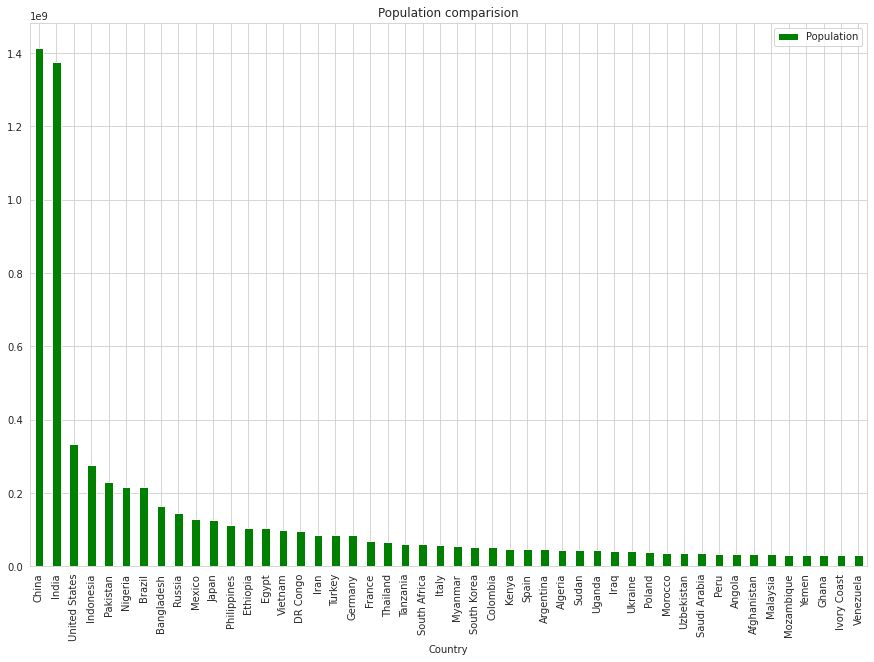

In [ ]:
final.plot(kind = 'bar',
        x = 'Country',
        y = 'Population',
        color = 'green',
        figsize = (15,10))

# set the title
plt.title('Population comparision')
# show the plot
plt.show()

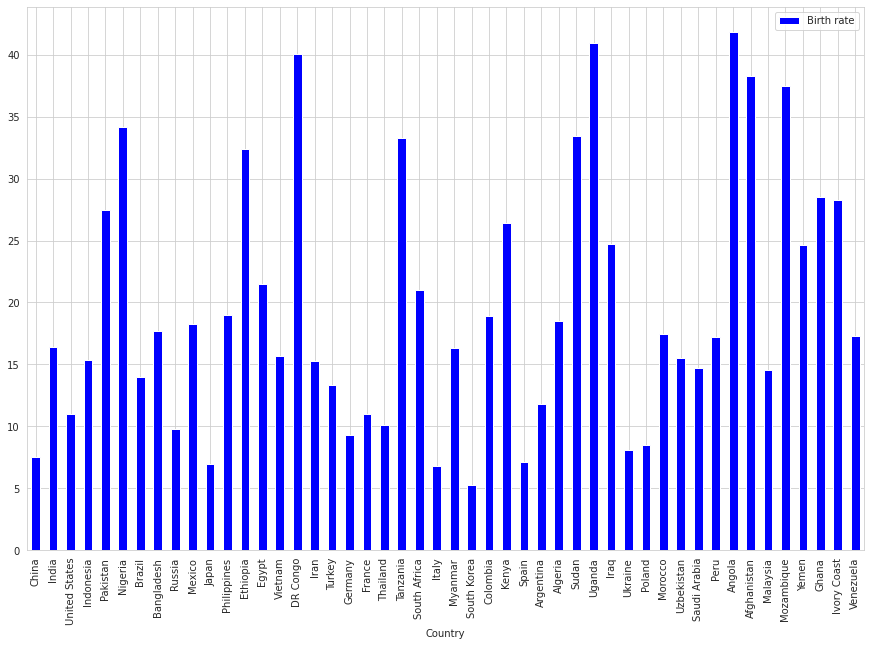

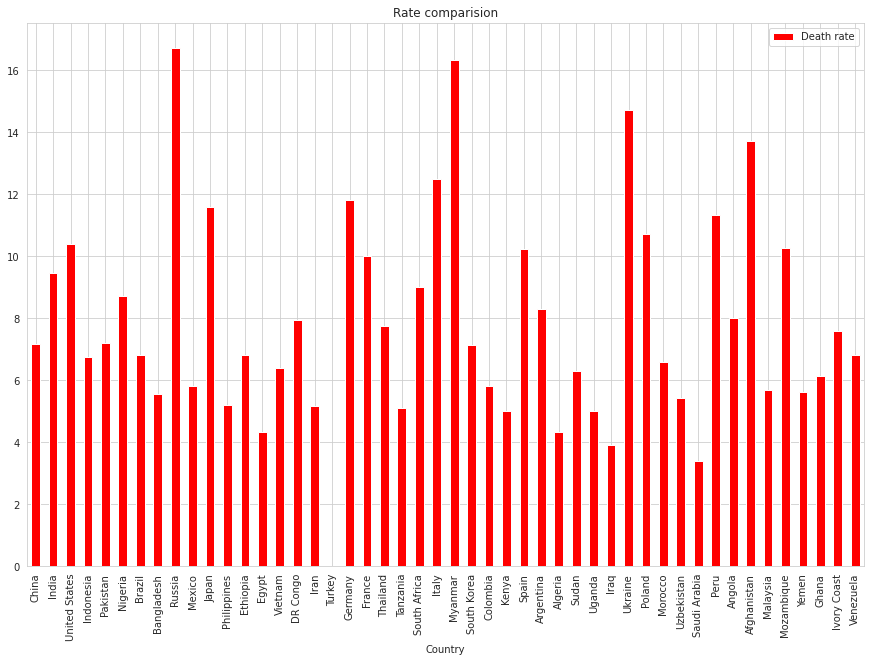

In [ ]:
df.plot(kind = 'bar', x = 'Country', y = 'Birth rate', color = 'blue', figsize = (15,10))
df.plot(kind = 'bar', x = 'Country', y = 'Death rate', color = 'r', figsize = (15,10))
# set the title
plt.title('Rate comparision')
# show the plot
plt.show()

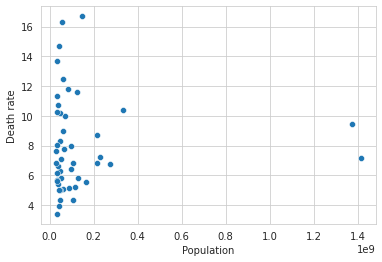

In [ ]:
import seaborn as sns
sns.scatterplot(x=df['Population'], y=df['Death rate'])

In [ ]:
mean_death= df['Death rate'].mean()
mean_death

8.008297872340425

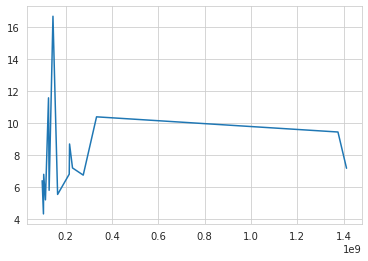

In [ ]:
x = df['Population']
x = x[:15]
y= df['Death rate']
y = y[:15]
plt.plot(x,y)

In [ ]:
death = df[df['Death rate']>mean_death]

In [ ]:
new = death[['Death rate','Population']]

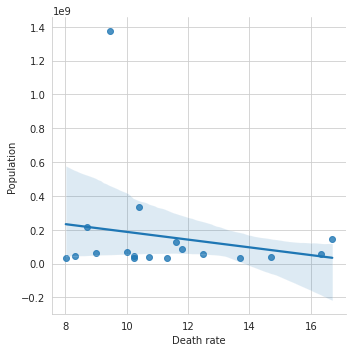

In [ ]:
import seaborn as sns

sns.set_style('whitegrid')
sns.lmplot(x = 'Death rate' , y = 'Population',data = new)

In [ ]:
new = death[['Birth rate','Population']]

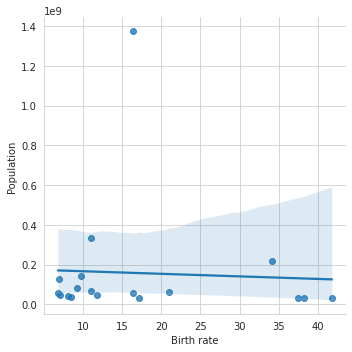

In [ ]:

sns.set_style('whitegrid')
sns.lmplot(x = 'Birth rate' , y = 'Population',data = new)

In [ ]:
death

,Rank,Country,Population,Date,Source,Links,Growth rate,Birth rate,Death rate,Life expectancy,male,female,Fertility rate
1,2,India,1375586000,1 Mar 2022,Official projection,/wiki/Demographics_of_India,0.68,16.42,9.45,67.20,65.80,68.90,NaN
2,3,United States,333270518,4 Nov 2022,Population Clock,/wiki/Demographics_of_the_United_States,0.13,11.00,10.40,76.10,73.20,79.10,NaN
5,6,Nigeria,216747000,1 Jul 2022,UN projection,/wiki/Demographics_of_Nigeria,2.53,34.19,8.70,61.33,59.51,63.27,4.62
8,9,Russia,145100000,1 Jun 2022,Official estimate,/wiki/Demographics_of_Russia,-7.20,9.80,16.70,70.09,65.51,74.51,1.52
10,11,Japan,125927902,1 Jan 2022,Official estimate,/wiki/Demographics_of_Japan,-0.39,6.95,11.59,84.83,81.92,87.90,1.30
18,19,Germany,84079811,30 Jun 2022,National quarterly estimate,/wiki/Demographics_of_Germany,0.10,9.30,11.80,81.20,78.64,83.40,1.58
19,20,France,67960000,1 Oct 2022,Monthly national estimate,/wiki/Demographics_of_France,NaN,11.00,10.00,82.20,79.20,85.20,1.83
23,24,South Africa,60604992,1 Jul 2022,Official estimate,/wiki/Demographics_of_South_Africa,1.43,21.00,9.00,64.70,61.50,67.50,NaN
24,25,Italy,58853482,31 Jul 2022,Monthly national estimate,/wiki/Demographics_of_Italy,-0.57,6.80,12.50,82.00,79.70,84.40,1.24
25,26,Myanmar,55294979,1 Jul 2021,National annual projection,/wiki/Demographics_of_Myanmar,0.78,16.34,16.34,69.92,68.27,71.67,2.02


In [ ]:
new = death[['Country','Death rate']]

In [ ]:
new

,Country,Death rate
1,India,9.45
2,United States,10.40
5,Nigeria,8.70
8,Russia,16.70
10,Japan,11.59
18,Germany,11.80
19,France,10.00
23,South Africa,9.00
24,Italy,12.50
25,Myanmar,16.34


In [ ]:
male_rate= death['male'].mean()
male_rate

71.153125

In [ ]:
female_rate= death['female'].mean()
female_rate

76.745625

Countries which are below average life expectancy

In [ ]:
below = df['Life expectancy'].mean()

In [ ]:
below

72.69604166666666

In [ ]:
countries_below = df[df['Life expectancy']<below]

In [ ]:
countries_below

,Rank,Country,Population,Date,Source,Links,Growth rate,Birth rate,Death rate,Life expectancy,male,female,Fertility rate
1,2,India,1375586000,1 Mar 2022,Official projection,/wiki/Demographics_of_India,0.68,16.42,9.45,67.20,65.80,68.90,NaN
4,5,Pakistan,229489000,1 Jul 2022,UN projection,/wiki/Demographics_of_Pakistan,1.85,27.50,7.20,66.10,63.80,68.60,NaN
5,6,Nigeria,216747000,1 Jul 2022,UN projection,/wiki/Demographics_of_Nigeria,2.53,34.19,8.70,61.33,59.51,63.27,4.62
8,9,Russia,145100000,1 Jun 2022,Official estimate,/wiki/Demographics_of_Russia,-7.20,9.80,16.70,70.09,65.51,74.51,1.52
11,12,Philippines,112646764,5 Nov 2022,National population clock,/wiki/Demographics_of_the_Philippines,1.63,19.00,5.20,72.66,68.72,74.74,2.70
12,13,Ethiopia,105163988,1 Jul 2022,National annual projection,/wiki/Demographics_of_Ethiopia,2.50,32.40,6.80,68.25,66.12,70.44,NaN
15,16,DR Congo,95241000,1 Jul 2022,UN projection,/wiki/Demographics_of_the_Democratic_Republic_...,3.14,40.08,7.94,61.83,60.03,63.69,5.63
22,23,Tanzania,61280743,1 Jul 2022,Official projection,/wiki/Demographics_of_Tanzania,2.78,33.30,5.09,70.19,68.42,72.02,4.39
23,24,South Africa,60604992,1 Jul 2022,Official estimate,/wiki/Demographics_of_South_Africa,1.43,21.00,9.00,64.70,61.50,67.50,NaN
25,26,Myanmar,55294979,1 Jul 2021,National annual projection,/wiki/Demographics_of_Myanmar,0.78,16.34,16.34,69.92,68.27,71.67,2.02


In [ ]:
b_mean_below = countries_below['Birth rate'].mean()

In [ ]:
b_mean_below

27.390476190476186

In [ ]:
df['Birth rate'].mean()

19.651041666666668

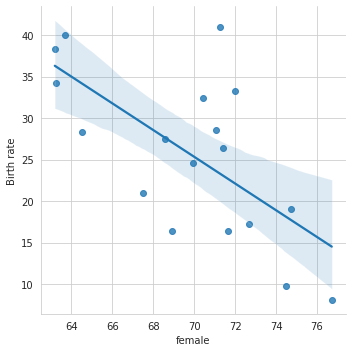

In [ ]:
import seaborn as sns
sli = countries_below[:40]

sns.set_style('whitegrid')
sns.lmplot(x = 'female' , y = 'Birth rate',data =countries_below )

In [ ]:
gr = df['Growth rate'].mean()
gr

0.9330434782608696

In [ ]:
countries_below = df[df['Growth rate']<gr]

In [ ]:
countries_below

,Rank,Country,Population,Date,Source,Links,Growth rate,Birth rate,Death rate,Life expectancy,male,female,Fertility rate
0,1,China,1412600000,31 Dec 2021,Official estimate,/wiki/Demographics_of_China,0.03,7.52,7.18,78.20,75.50,81.20,1.16
1,2,India,1375586000,1 Mar 2022,Official projection,/wiki/Demographics_of_India,0.68,16.42,9.45,67.20,65.80,68.90,NaN
2,3,United States,333270518,4 Nov 2022,Population Clock,/wiki/Demographics_of_the_United_States,0.13,11.00,10.40,76.10,73.20,79.10,NaN
3,4,Indonesia,275773800,1 Jul 2022,Official estimate,/wiki/Demographics_of_Indonesia,0.79,15.32,6.75,73.08,70.86,75.40,2.01
6,7,Brazil,215354027,5 Nov 2022,National population clock,/wiki/Demographics_of_Brazil,0.70,13.96,6.81,75.92,72.50,79.50,1.80
8,9,Russia,145100000,1 Jun 2022,Official estimate,/wiki/Demographics_of_Russia,-7.20,9.80,16.70,70.09,65.51,74.51,1.52
10,11,Japan,125927902,1 Jan 2022,Official estimate,/wiki/Demographics_of_Japan,-0.39,6.95,11.59,84.83,81.92,87.90,1.30
17,18,Turkey,84680273,31 Dec 2021,Official estimate,/wiki/Demographics_of_Turkey,0.55,13.30,NaN,78.60,75.90,81.30,1.70
18,19,Germany,84079811,30 Jun 2022,National quarterly estimate,/wiki/Demographics_of_Germany,0.10,9.30,11.80,81.20,78.64,83.40,1.58
21,22,Thailand,66855567,5 Nov 2022,National population clock,/wiki/Demographics_of_Thailand,0.23,10.14,7.76,77.66,74.65,80.83,1.54


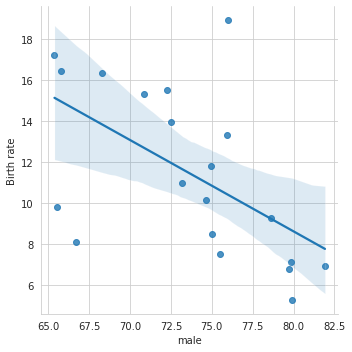

In [ ]:
import seaborn as sns

sns.set_style('whitegrid')
sns.lmplot(x = 'male' , y = 'Birth rate',data =countries_below )

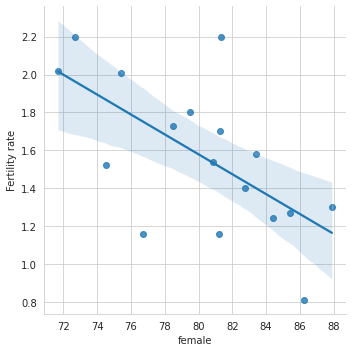

In [ ]:
import seaborn as sns

sns.set_style('whitegrid')
sns.lmplot(x = 'female' , y = 'Fertility rate',data =countries_below )